This notebook reads in a .tif that I want to plot in PyGMT. Then, it converts the zero [NO DATA VALUE] to Nans, and saves it as another tif.

Written 8-14-23.
***
***

In [1]:
#Import any other modules you want to use
import numpy as np
import matplotlib.pyplot as plt
from osgeo import gdal
%matplotlib  widget

In [2]:
# load the unfilt unwrapped igram geotiff
#loadThis = '/data/ocp4/LagunaSalada/Data_and_Figs/16_PyGMT/geo_20200605_20200611_unfilt.tif'
#loadThis = '/data/ocp4/LagunaSalada/Data_and_Figs/16_PyGMT/Fig2_A/geo_20181125_20181207_unfilt_entire_crop_area.tif'
loadThis = '/data/ocp4/LagunaSalada/Data_and_Figs/16_PyGMT/Fig2_A/geo_20181125_20181207_filt_entire_crop_area.tif'
igram = gdal.Open(loadThis)
print(igram)

<osgeo.gdal.Dataset; proxy of <Swig Object of type 'GDALDatasetShadow *' at 0x7f9d7c73efc0> >


In [3]:
band = igram.GetRasterBand(1)
# Compute statistics if needed
if band.GetMinimum() is None or band.GetMaximum()is None:
    band.ComputeStatistics(0)
    print("Statistics computed.")

# Fetch metadata for the band
band.GetMetadata()

# Print only selected metadata:
print ("[ NO DATA VALUE ] = ", band.GetNoDataValue()) # none
print ("[ MIN ] = ", band.GetMinimum())
print ("[ MAX ] = ", band.GetMaximum())

Statistics computed.
[ NO DATA VALUE ] =  0.0
[ MIN ] =  -3.1415128707886
[ MAX ] =  3.1415090560913


In [4]:
igramArray = igram.ReadAsArray()
type(igramArray)

numpy.ndarray

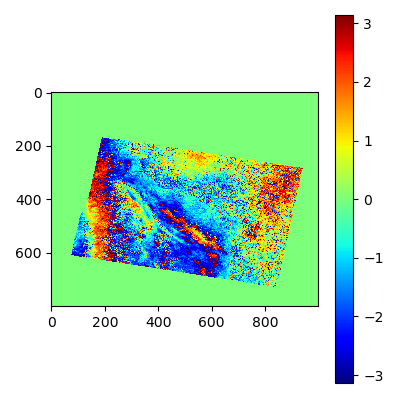

In [5]:
plt.figure(figsize=(4,4),tight_layout=True)
plt.imshow(igramArray,cmap='jet',interpolation='none')
plt.colorbar()
plt.show()

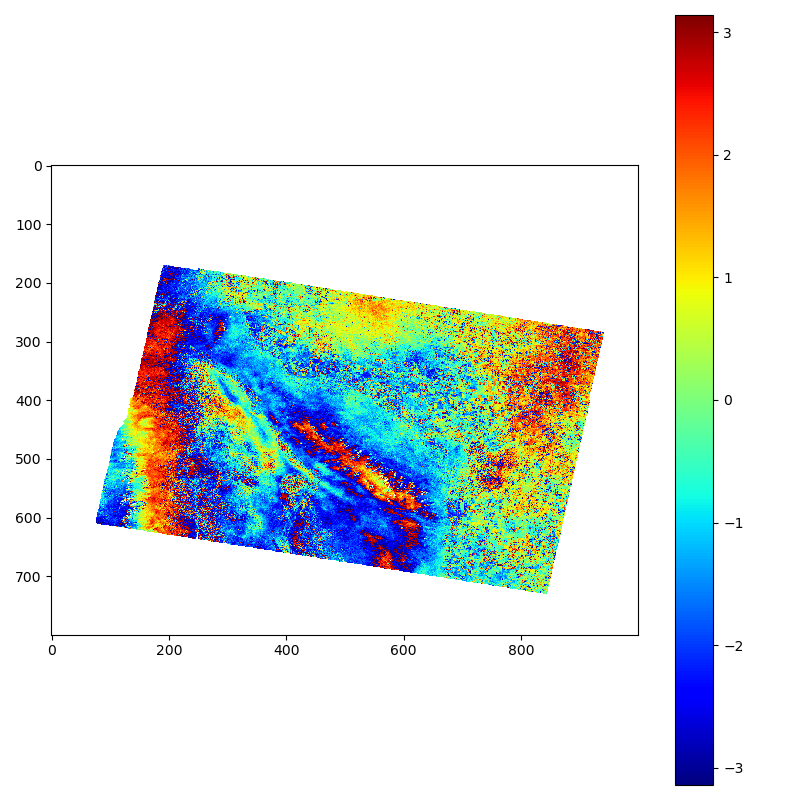

-3.1415129
3.141509


In [6]:
igramArray[igramArray==0.0] = np.nan

plt.figure(figsize=(8,8),tight_layout=True)
plt.imshow(igramArray,cmap='jet',interpolation='none')
plt.colorbar()
plt.show()

print(np.nanmin(igramArray))
print(np.nanmax(igramArray))

Used this function defined here: 
https://here.isnew.info/how-to-save-a-numpy-array-as-a-geotiff-file-using-gdal.html 

In [7]:
def write_geotiff(filename, arr, in_ds):
    if arr.dtype == np.float32:
        arr_type = gdal.GDT_Float32
    else:
        arr_type = gdal.GDT_Int32

    driver = gdal.GetDriverByName("GTiff")
    out_ds = driver.Create(filename, arr.shape[1], arr.shape[0], 1, arr_type)
    out_ds.SetProjection(in_ds.GetProjection())
    out_ds.SetGeoTransform(in_ds.GetGeoTransform())
    band = out_ds.GetRasterBand(1)
    band.WriteArray(arr)
    band.FlushCache()
    band.ComputeStatistics(False)

In [8]:
#saveFile = '/data/ocp4/LagunaSalada/Data_and_Figs/16_PyGMT/geo_20200605_20200611_unfilt_Nans.tif'
#saveFile = '/data/ocp4/LagunaSalada/Data_and_Figs/16_PyGMT/Fig2_A/geo_20181125_20181207_unfilt_entire_crop_area_Nans.tif'
saveFile = '/data/ocp4/LagunaSalada/Data_and_Figs/16_PyGMT/Fig2_A/geo_20181125_20181207_filt_entire_crop_area_Nans.tif'
write_geotiff(saveFile, igramArray, igram)